In [1]:
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import os
import sys

sys.path.append(os.path.expanduser("~/GitHub/multiplex-plot"))
sys.path = list(set(sys.path))

from multiplex.drawable import Drawable

In [2]:
# load the style
plt.style.use(os.path.join(os.getcwd(), '..', 'modern-custom.style'))
plt.style.reload_library()

# create the style
scale_style = { 'fontsize': 72 }
title_style = { 'fontsize': 18, 'alpha': 1 }
description_style = { 'fontsize': 12, 'alpha': 0.7 }
term_style = { 'fontsize': 12, 'alpha': 0.5, 'wordspacing': 0.025, 'lineheight': 1.25 }
xpad, ypad, tpad = 0.2, 0.2, 0

# prepare the data
titles = [
    "Function words",
    "Minimally-related",
    "Closely-related",
    "Domain-specific"
]
descriptions = [
    "Words that are used in the same way in all domains",
    "Words that help describe what happens in an event",
    "Words that describe what happens during an event",
    "Words that only have a meaning within the domain",
]

term_sets = [
    [ 'the', 'have', 'they', 'during', 'love', 'amazing', 'brilliant', 'poor', 'entertaining' ],
    [ 'yard', 'elbow', 'leg', 'foot', 'shirt', 'minute', 'replace', 'performance' ],
    [ 'home', 'yellow', 'goal', 'offside', 'onside', 'red', 'substitute', 'penalty' ],
    [ 'VAR', 'Champions League', 'FIFA', 'Premier League', 'Lionel Messi', 'Liverpool F.C.' ]
]

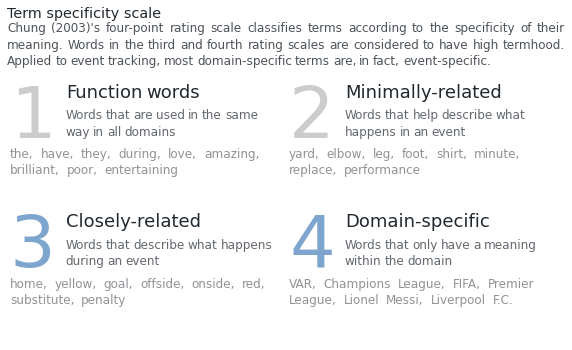

In [3]:
# draw the scale
viz = Drawable(plt.figure(figsize=(10, 5)))

# draw the scale numbering and then the titles and descriptions
for i in range(len(titles)):
    color = 'C5' if i < 2 else 'C1'
    x, y = i % 2, math.floor(i / 2)
    viz.annotate(f"{i + 1}", (x, x + 1), (y),
                 align='left', va='top', color=color, **scale_style)

    title, description, terms = titles[i], descriptions[i], term_sets[i]
    viz.annotate(title, (x + xpad, x + 1), y,
                 align='left', va='top', **title_style)
    viz.annotate(description, (x + xpad, x + 1), y + ypad,
                 align='left', va='top', **description_style)
    viz.annotate(', '.join(terms[:]), (x, x + 1), y + 0.5,
                 align='left', va='top', **term_style)

# finalize the visualization
viz.set_xticks([])
viz.set_yticks([])
viz.set_xlim(0, 2)
viz.set_ylim(-0.1, 2)
viz.grid(False)
viz.axes.axes.set_frame_on(False)
viz.invert_yaxis()
viz.set_title('Term specificity scale', loc='left')
viz.set_caption("""Chung (2003)'s four-point rating scale classifies terms according to the specificity of their meaning.
                   Words in the third and fourth rating scales are considered to have high termhood.
                   Applied to event tracking, most domain-specific terms are, in fact, event-specific.""",
                align='justify')
viz.savefig('../exports/4.2-specificity-scale.png', dpi=300, bbox_inches='tight')